In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import cv2

In [3]:
%cd /content/gdrive/MyDrive

/content/gdrive/MyDrive


#Create Directories and Clone Official YOLOv7 Repo

In [ ]:
'''import os
if not os.path.isdir("Yolov7_CustomObject"):
  os.makedirs("Yolov7_CustomObject")'''

'import os\nif not os.path.isdir("Yolov7_CustomObject"):\n  os.makedirs("Yolov7_CustomObject")'

In [ ]:
#%cd Yolov7_CustomObject

In [ ]:
#!git clone https://github.com/WongKinYiu/yolov7.git

#Training YOLO v7 model




In [4]:
!pwd

/content/gdrive/MyDrive


In [5]:
%cd Yolov7_CustomObject

/content/gdrive/MyDrive/Yolov7_CustomObject


In [6]:
cd yolov7

/content/gdrive/MyDrive/Yolov7_CustomObject/yolov7


In [7]:
#!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt

In [8]:
!python train.py --device 0 --batch-size 2 --img 640 640 --epochs 400 --data data/custom_data.yaml --hyp data/hyp.scratch.custom.yaml --cfg cfg/training/yolov7-custom.yaml --weights yolov7.pt

2024-01-15 07:28:03.907417: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-15 07:28:03.907533: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-15 07:28:03.909601: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-15 07:28:03.921166: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-15 07:28:06.091354: W tensorflow/compiler/tf2

In [ ]:
#runs/train/exp4/weights/last.pt
#runs/train/exp4/weights/best.pt

In [9]:
!python detect.py --weights runs/train/exp4/weights/best.pt --img 640 --conf 0.45 --source ../Testing.jpeg

Namespace(weights=['runs/train/exp4/weights/best.pt'], source='../Testing.jpeg', img_size=640, conf_thres=0.45, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-116-g8c0bf3f torch 2.1.0+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36541106 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
1 Fish, 3 Fish_RedS

In [10]:
!python detect.py --weights runs/train/exp4/weights/best.pt --img 640 --conf 0.45 --source 0

Namespace(weights=['runs/train/exp4/weights/best.pt'], source='0', img_size=640, conf_thres=0.45, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-116-g8c0bf3f torch 2.1.0+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36541106 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/usr/local/lib/python3.10/dist-packages/cv2/qt/plugins" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform pl

In [12]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


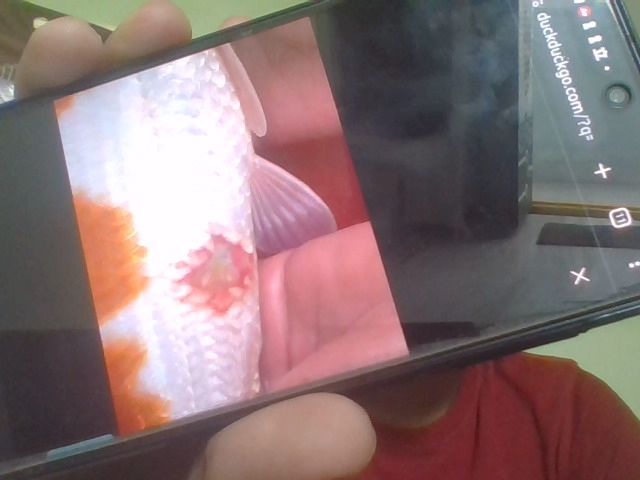

In [14]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  display(Image(filename))
except Exception as err:
  print(str(err))

#8

In [15]:
!python detect.py --weights runs/train/exp4/weights/best.pt --img 640 --conf 0.55 --source photo.jpg

Namespace(weights=['runs/train/exp4/weights/best.pt'], source='photo.jpg', img_size=640, conf_thres=0.55, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-116-g8c0bf3f torch 2.1.0+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36541106 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Done. (18.1ms) Inference,

#9